# Customsing Plot Legends

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

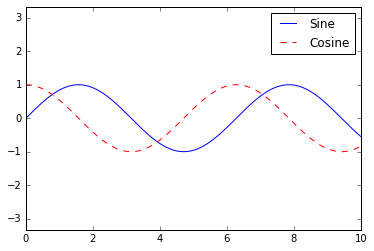

In [2]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

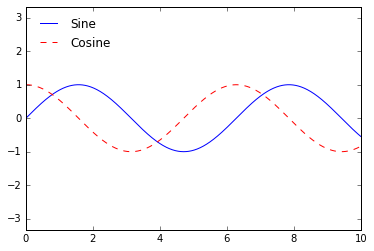

In [5]:
ax.legend(loc='upper left', frameon=False)
fig

ncol is number of columns 

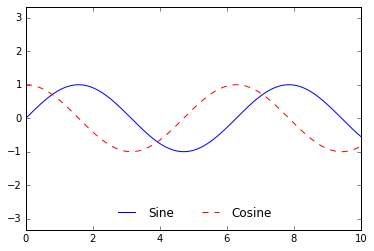

In [9]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can use a rounded box (fancybox) or add a shadown, change the transparency, or change the padding around the text

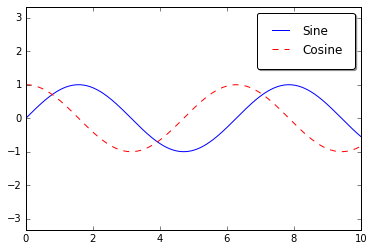

In [21]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## Choosing Elements for the Legend

The plt.plot() command can create multiple lines at once, and returns a list of creaeted line instances:

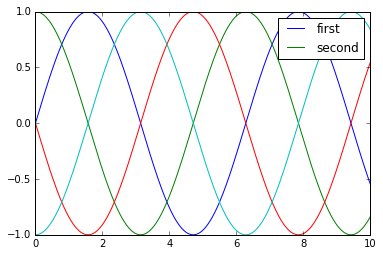

In [31]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.line2D instances
plt.legend(lines[:2], ['first', 'second']);

It is probably easier just to give the ones you'd like labelled one when plotting:

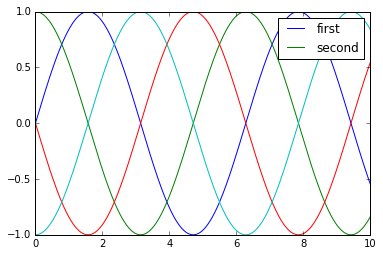

In [35]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

## Multiple Legends

Sometimes you want to add multiple legends, but we can't do this with plt.legend(), since it will override the old one. We can work around this by creating a new legend artist from scratch, and then using the lower level ax.add_artist() method:

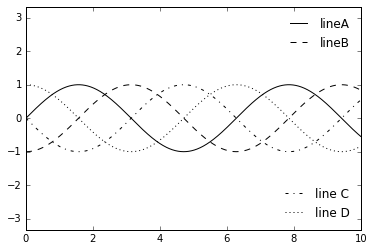

In [38]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi/2),
                    styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['lineA', 'lineB'],
          loc='upper right', frameon=False)

# create the second legend and add the artist manually
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

This gives an idea of the low-level artist objects thta comprise any Matplotlib plot. The ax.legend method simply consists of creating a suitable Legend artist, which is then saved in the legend_ attribute and added to the figure when the plot is drawn